In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.preprocessing import image
import os

In [2]:
os.getcwd()

'/workspace'

In [6]:
with zipfile.ZipFile('/workspace/archive.zip') as zip_ref:
    zip_ref.extractall()

In [3]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import Xception

In [87]:
trainDIR = '/workspace/seg_train/seg_train/'
testDIR = '/workspace/seg_test/seg_test/'
predDIR = '/workspace/seg_pred/'

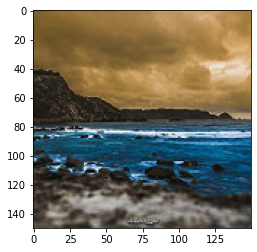

In [70]:
r_img = image.load_img(predDIR+r'/'+"10127.jpg")
r_img_tensor = image.img_to_array(r_img)
r_img_tensor = np.expand_dims(r_img_tensor,axis=0)
r_img_tensor/=255.
plt.imshow(r_img_tensor[0])

In [5]:
def get_images(directory):
    Images=[]
    Labels=[]
    
    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 0
        elif labels == 'sea':
            label = 1
        elif labels == 'buildings':
            label = 2
        elif labels == 'forest':
            label = 3
        elif labels == 'mountain':
            label = 4
        elif labels == 'street':
            label = 5
        
        for file in os.listdir(directory+labels):
            im =  image.load_img(directory+labels+r'/'+file, target_size=(150,150))
            img = image.img_to_array(im)
            Images.append(img)
            Labels.append(label)
    
    Images, Labels = sklearn.utils.shuffle(Images, Labels, random_state=14)
    return Images, Labels

In [6]:
Images, Labels = get_images(trainDIR)
Images = np.array(Images)
Labels = np.array(Labels)

In [7]:
Images.shape

(14034, 150, 150, 3)

In [8]:
Labels.shape

(14034,)

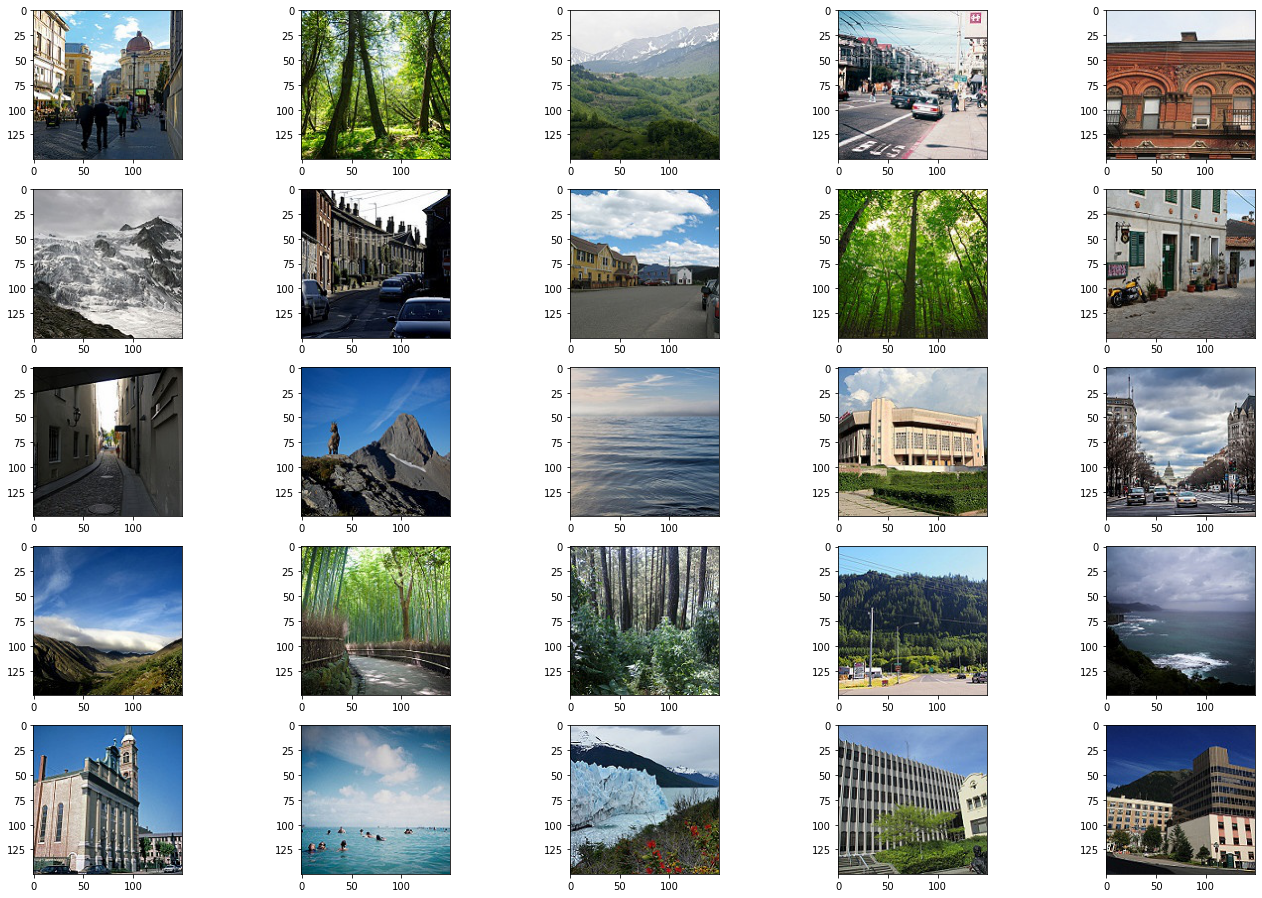

In [74]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)

for i in range(0,5):
    for j in range(0,5):
        rand = np.random.randint(0,len(Images))
        img = Images[rand]
        img = np.expand_dims(img, axis=0)
        img/=255.
        ax[i,j].imshow(img[0])

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(6,'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 500)               87616500  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3006      
Total params: 87,620,402
Trainable params: 87,620,402
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
callbacks_list = [ReduceLROnPlateau(monitor='accuracy',
                                factor=0.1,
                                patience=5),
                  EarlyStopping(monitor='accuracy',
                               patience=5)
                 ]

In [12]:
fitted = model.fit(Images, Labels,
         epochs=15,
         validation_split=0.25,
         callbacks=callbacks_list)

Epoch 1/15
329/329 [==============================] - 5s 15ms/step - loss: 350.3152 - accuracy: 0.4827 - val_loss: 7.1174 - val_accuracy: 0.5198
Epoch 2/15
329/329 [==============================] - 5s 15ms/step - loss: 1.7691 - accuracy: 0.7776 - val_loss: 5.2325 - val_accuracy: 0.5816
Epoch 3/15
329/329 [==============================] - 5s 14ms/step - loss: 0.6060 - accuracy: 0.9060 - val_loss: 5.4192 - val_accuracy: 0.5836
Epoch 4/15
329/329 [==============================] - 5s 14ms/step - loss: 0.4453 - accuracy: 0.9337 - val_loss: 6.3817 - val_accuracy: 0.5848
Epoch 5/15
329/329 [==============================] - 5s 14ms/step - loss: 0.4126 - accuracy: 0.9484 - val_loss: 7.7361 - val_accuracy: 0.5848
Epoch 6/15
329/329 [==============================] - 5s 14ms/step - loss: 0.3778 - accuracy: 0.9496 - val_loss: 6.9023 - val_accuracy: 0.5985
Epoch 7/15
329/329 [==============================] - 5s 15ms/step - loss: 0.2809 - accuracy: 0.9599 - val_loss: 8.1935 - val_accuracy: 0.56

In [13]:
model.save_weights('first_model.h5')

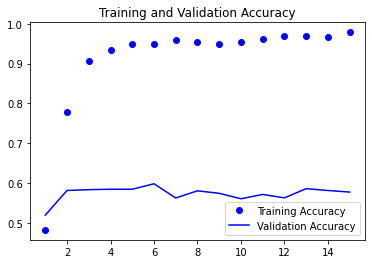

In [14]:
acc = fitted.history['accuracy']
val_acc  = fitted.history['val_accuracy']
loss = fitted.history['loss']
val_loss = fitted.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

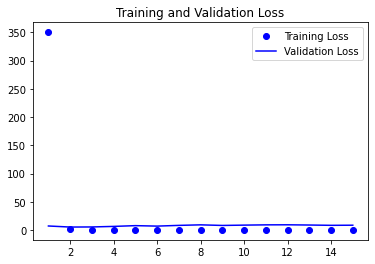

In [15]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [16]:
model2 = Sequential()
model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(6, activation='softmax'))

In [20]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
history = model2.fit(Images, Labels, 
                    epochs=15,
                    validation_split=0.25,
                    callbacks=callbacks_list)

Epoch 1/15
329/329 [==============================] - 6s 17ms/step - loss: 5.9341 - accuracy: 0.3413 - val_loss: 1.5668 - val_accuracy: 0.3249
Epoch 2/15
329/329 [==============================] - 5s 14ms/step - loss: 1.3337 - accuracy: 0.4348 - val_loss: 1.2769 - val_accuracy: 0.4762
Epoch 3/15
329/329 [==============================] - 5s 14ms/step - loss: 1.0180 - accuracy: 0.5863 - val_loss: 1.2545 - val_accuracy: 0.4845
Epoch 4/15
329/329 [==============================] - 5s 14ms/step - loss: 0.7033 - accuracy: 0.7192 - val_loss: 1.8231 - val_accuracy: 0.4369
Epoch 5/15
329/329 [==============================] - 5s 14ms/step - loss: 0.5123 - accuracy: 0.7894 - val_loss: 1.9881 - val_accuracy: 0.5021
Epoch 6/15
329/329 [==============================] - 5s 14ms/step - loss: 0.3631 - accuracy: 0.8550 - val_loss: 2.3507 - val_accuracy: 0.4996
Epoch 7/15
329/329 [==============================] - 4s 14ms/step - loss: 0.3627 - accuracy: 0.8589 - val_loss: 2.4678 - val_accuracy: 0.4694

In [22]:
model2.save_weights('second_model.h5')

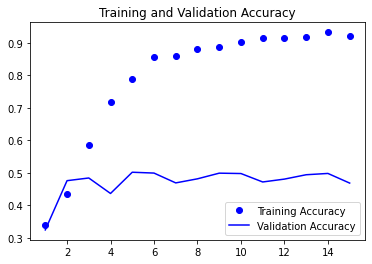

In [23]:
acc = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

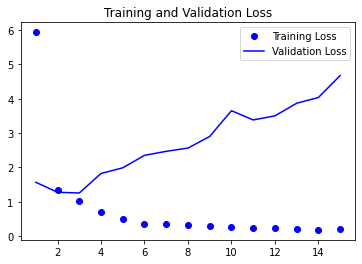

In [24]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [25]:
conv_base = Xception(weights='imagenet',
                    include_top=False,
                    input_shape=(150,150,3))

In [26]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [27]:
model3 = tf.keras.models.Sequential()

model3.add(conv_base)
model3.add(Flatten())
model3.add(Dense(256,activation='relu'))
model3.add(Dense(6,activation='softmax'))

In [30]:
conv_base.trainable=False

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
history = model3.fit(Images, Labels,
          epochs=15,
          validation_split=0.25,
          callbacks=callbacks_list)

Epoch 1/15
329/329 [==============================] - 10s 30ms/step - loss: 0.9054 - accuracy: 0.5921 - val_loss: 1.2319 - val_accuracy: 0.5651
Epoch 2/15
329/329 [==============================] - 9s 28ms/step - loss: 0.8865 - accuracy: 0.6039 - val_loss: 1.2530 - val_accuracy: 0.5825
Epoch 3/15
329/329 [==============================] - 9s 29ms/step - loss: 0.8558 - accuracy: 0.6238 - val_loss: 1.2553 - val_accuracy: 0.5480
Epoch 4/15
329/329 [==============================] - 9s 29ms/step - loss: 0.8730 - accuracy: 0.6156 - val_loss: 1.1843 - val_accuracy: 0.5526
Epoch 5/15
329/329 [==============================] - 9s 29ms/step - loss: 0.8521 - accuracy: 0.6213 - val_loss: 1.2232 - val_accuracy: 0.5654
Epoch 6/15
329/329 [==============================] - 9s 29ms/step - loss: 0.8438 - accuracy: 0.6299 - val_loss: 1.2312 - val_accuracy: 0.5825
Epoch 7/15
329/329 [==============================] - 9s 29ms/step - loss: 0.8528 - accuracy: 0.6242 - val_loss: 1.2800 - val_accuracy: 0.556

In [36]:
model3.save_weights("model3.h5")

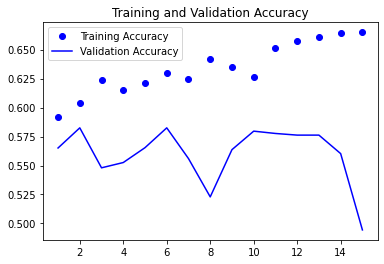

In [37]:
acc = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

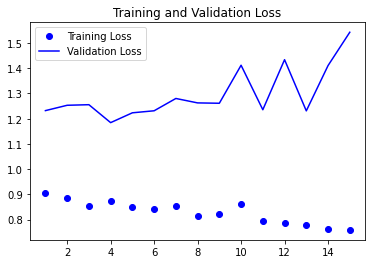

In [38]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [46]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  validation_split=0.25)

train_generator = train_datagen.flow_from_directory(trainDIR,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(testDIR,
                                                 batch_size=32,
                                                 target_size=(150,150),
                                                 class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [39]:
model4 = Sequential()
model4.add(Conv2D(200, (3,3), activation='relu', input_shape=(150,150,3)))
model4.add(MaxPooling2D(5,5))
model4.add(Conv2D(150, (3,3), activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Flatten())
model4.add(Dense(256,activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(6,activation='softmax'))

In [43]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
history = model4.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              callbacks=callbacks_list,
                              validation_steps=100)

Epoch 1/20
100/100 [==============================] - 11s 114ms/step - loss: 1.4849 - accuracy: 0.3747
Epoch 2/20
100/100 [==============================] - 12s 117ms/step - loss: 1.2167 - accuracy: 0.5122
Epoch 3/20
100/100 [==============================] - 12s 117ms/step - loss: 1.1148 - accuracy: 0.5500
Epoch 4/20
100/100 [==============================] - 12s 116ms/step - loss: 1.1173 - accuracy: 0.5512
Epoch 5/20
100/100 [==============================] - 12s 119ms/step - loss: 1.0591 - accuracy: 0.5831
Epoch 6/20
100/100 [==============================] - 12s 117ms/step - loss: 1.0474 - accuracy: 0.5763
Epoch 7/20
100/100 [==============================] - 12s 118ms/step - loss: 1.0210 - accuracy: 0.5863
Epoch 8/20
100/100 [==============================] - 12s 120ms/step - loss: 1.0002 - accuracy: 0.5966
Epoch 9/20
100/100 [==============================] - 12s 118ms/step - loss: 0.9636 - accuracy: 0.6128
Epoch 10/20
100/100 [==============================] - 12s 118ms/step - l

In [49]:
model4.save_weights("model4.h5")

In [32]:
test, test_labels = get_images(testDIR)

test = np.array(test)
test_labels = np.array(test_labels)

loss, acc = model.evaluate(test,test_labels)

94/94 [==============================] - 1s 6ms/step - loss: 9.3221 - accuracy: 0.5583


In [33]:
loss, acc = model2.evaluate(test,test_labels)

94/94 [==============================] - 1s 7ms/step - loss: 4.4176 - accuracy: 0.4540


In [34]:
loss, acc = model3.evaluate(test,test_labels)

94/94 [==============================] - 2s 23ms/step - loss: 1.2673 - accuracy: 0.5140


In [48]:
loss, acc = model4.evaluate(test_generator,steps=50)

50/50 [==============================] - 2s 37ms/step - loss: 0.6717 - accuracy: 0.7569


In [71]:
layer_outputs = [layer.output for layer in model4.layers[:8]]
activation_model = tf.keras.models.Model(inputs=model4.input, outputs=layer_outputs)
activations = activation_model.predict(r_img_tensor)

first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 200)

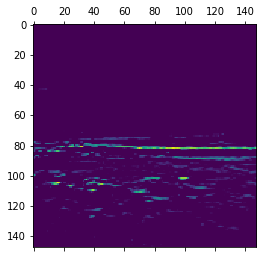

In [72]:
plt.matshow(first_layer_activation[0,:,:,4])

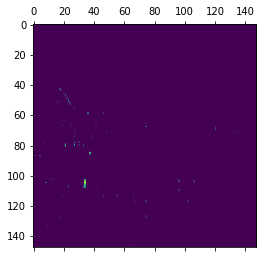

In [73]:
plt.matshow(first_layer_activation[0,:,:,150])

In [75]:
layer_name = 'block3_sepconv1'

In [76]:
model5 = conv_base
layer = model5.get_layer(layer_name)
feature_extractor = tf.keras.Model(inputs=model5.inputs, outputs=layer.output)

In [77]:
def compute_loss(input_img, filter_index):
    activation = feature_extractor(input_img)
    filter_activation = activation[:,2:-2, 2:-2,filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, lr):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss= compute_loss(img, filter_index)
        grads=tape.gradient(loss,img)
        grads = tf.math.l2_normalize(grads)
        img+=lr*grads
        return loss, img

def initialize_image():
    img = tf.random.uniform((1,img_width, img_height, 3))
    return (img - 0.5)*0.25

def visualize_filter(filter_index):
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img,filter_index, learning_rate)
    img = deprocess_image(img[0].numpy())
    return loss, img

def deprocess_image(img):
    img-=img.mean()
    img /= img.std() + 1e-5
    img*=0.15
    
    img = img[25:-25, 25:-25,:]
    
    img += 0.5
    img = np.clip(img, 0, 1)
    
    img*=255
    img=np.clip(img,0,255).astype('uint8')
    return img

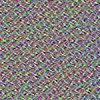

In [81]:
from IPython.display import Image, display

img_width = 150
img_height = 150

loss, img = visualize_filter(0)
image.save_img("0.png", img)
display(Image("0.png"))

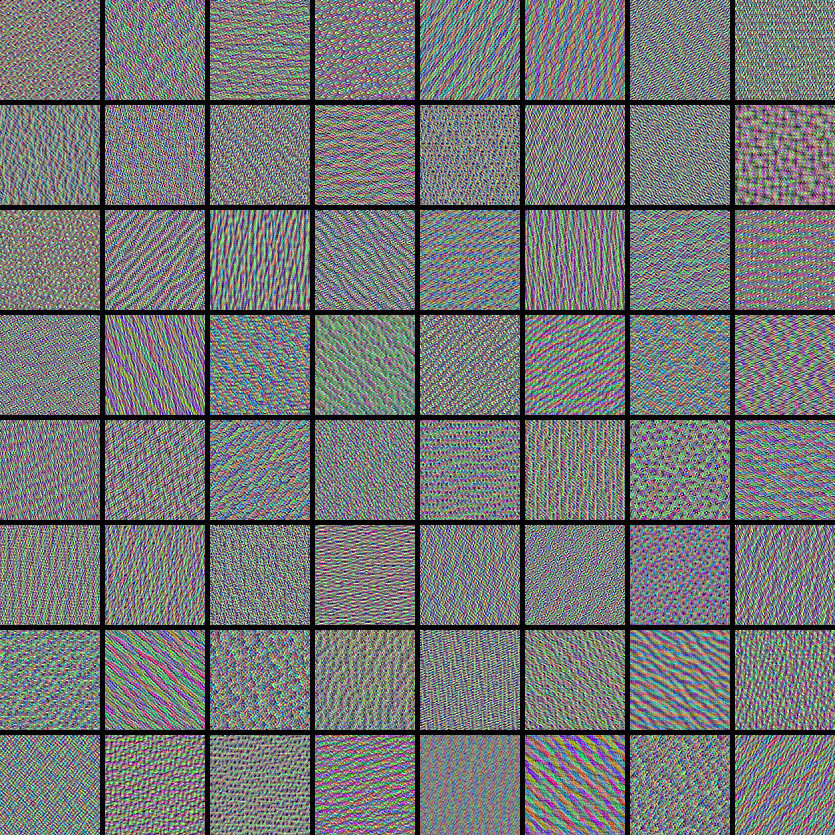

In [94]:
all_imgs=[]

for filter_index in range(64):
    loss, img = visualize_filter(filter_index)
    all_imgs.append(img)
    
    
margin=5
n=8
cropped_width = img_width - 25 *2
cropped_height = img_height - 25*2
width= n * cropped_width + (n-1)*margin
height = n*cropped_height + (n-1)*margin
stitched_filters = np.zeros((width, height, 3))


for i in range(n):
    for j in range(n):
        img=all_imgs[i*n+j]
        stitched_filters[(cropped_width+margin)*i : (cropped_width + margin) * i + cropped_width,
                        (cropped_height + margin)*j : (cropped_height + margin) * j + cropped_height, :, ] = img
        image.save_img('stitched_filters.png', stitched_filters)

display(Image("stitched_filters.png"))
        

In [85]:
test.shape

(3000, 150, 150, 3)

In [89]:
test_labels.shape

(3000,)

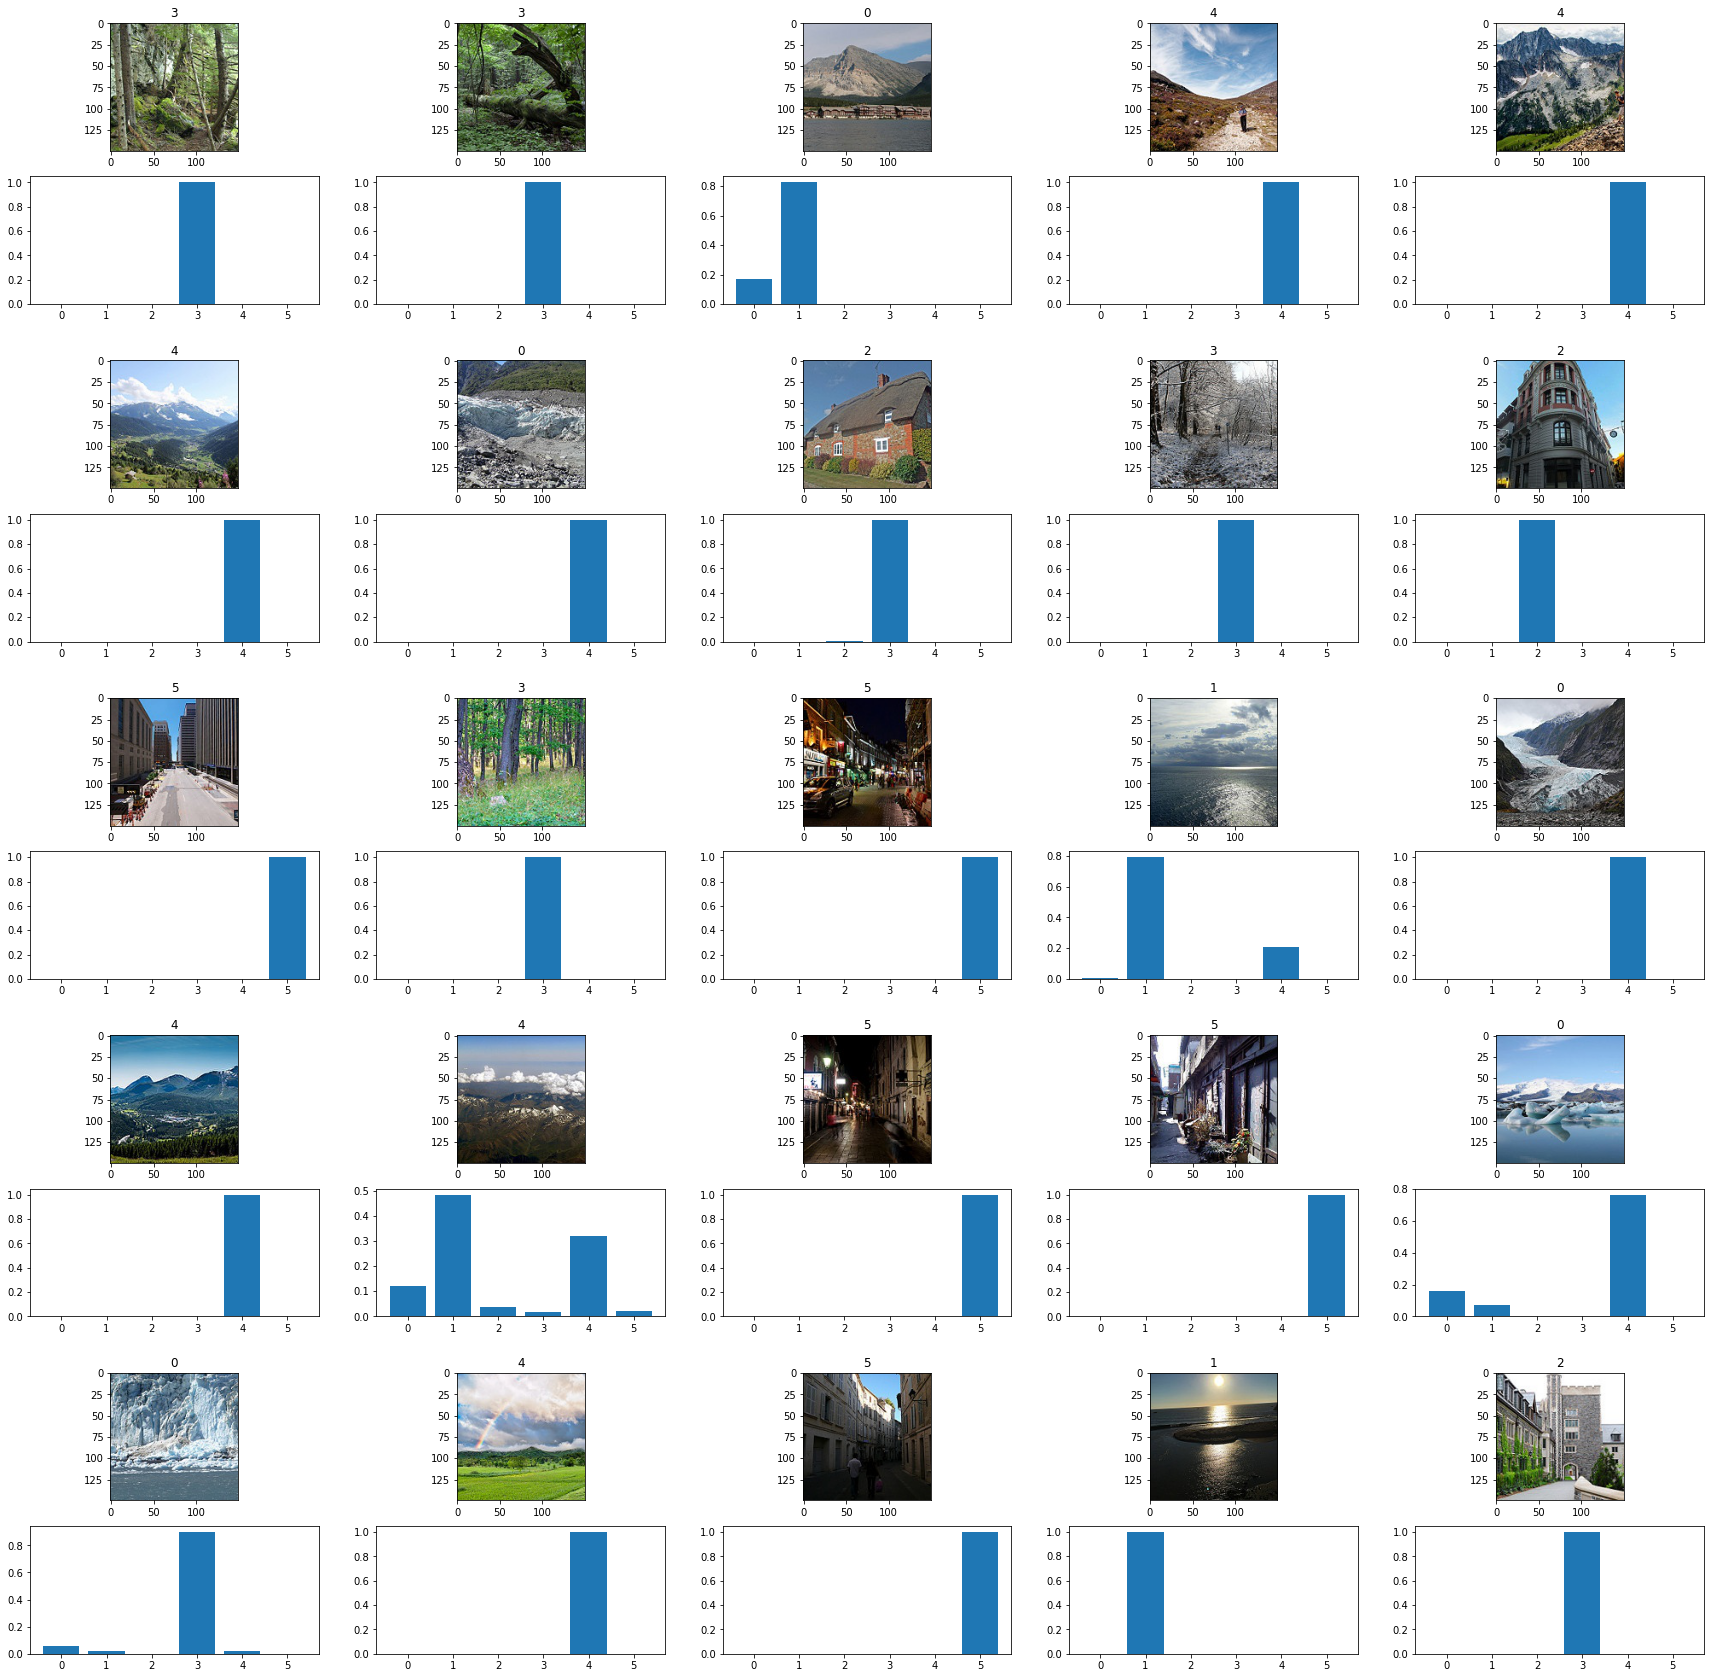

In [98]:
import matplotlib
fig = plt.figure(figsize=(30,30))
outer = matplotlib.gridspec.GridSpec(5,5)

for i in range(25):
    inner = matplotlib.gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=outer[i])
    rand = np.random.randint(0,len(test))
    pred_img = np.array([test[rand]])
    actual_class = test_labels[rand]
    pred_prob = model.predict(pred_img).reshape(6)
    
    for j in range(2):
        ax = plt.Subplot(fig,inner[j])
        if(j%2) == 0:
            pred_img/=255.
            ax.imshow(pred_img[0])
            ax.set_title(actual_class)
        else:
            ax.bar([0,1,2,3,4,5], pred_prob)
        fig.add_subplot(ax)